In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df = pd.read_csv("realestate_data_london_2024_nov.csv")

# Caracterization of the dataset

In [4]:
#Checking the dataset
df.head()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"


In [5]:
#Checking the shape
df.shape

(1019, 9)

In [6]:
#Checking the unique values of listingUpdateReason
df['listingUpdateReason'].unique()

array(['new', 'price_reduced', 'size_change'], dtype=object)

In [7]:
#Checking the unique values of propertyType
df['propertyType'].unique()

array(['House', 'Terraced', 'Detached', 'Town House', 'Apartment',
       'Duplex', 'Penthouse', 'Semi-Detached', 'Flat', 'Plot',
       'Not Specified', 'End of Terrace', 'Equestrian Facility', 'Villa',
       'Land', 'Block of Apartments', 'Mews', 'Link Detached House',
       'Character Property', 'Maisonette', 'Ground Flat'], dtype=object)

In [8]:
#Cehcking the statistical information from numerical variables
df.describe()

,sizeSqFeetMax,bedrooms,bathrooms
count,869.000000,1003.000000,984.000000
mean,5232.871116,5.111665,4.648374
std,11796.770144,3.264992,3.085809
min,425.000000,1.000000,1.000000
25%,2885.000000,3.000000,3.000000
50%,3834.000000,5.000000,4.000000
75%,5745.000000,6.000000,5.000000
max,336989.000000,66.000000,66.000000


In [9]:
#Checking the quantity of missing values within the dataset
df.isnull().sum()

addedOn                  8
title                    0
descriptionHtml          0
propertyType             0
sizeSqFeetMax          150
bedrooms                16
bathrooms               35
listingUpdateReason      0
price                    0
dtype: int64

# Treatment of the dataset and EDA Visualization

In [11]:
#Removing the missing values
df = df.dropna(axis=0)

In [12]:
#Confirming that the missing values have been removed
df.isnull().sum()

addedOn                0
title                  0
descriptionHtml        0
propertyType           0
sizeSqFeetMax          0
bedrooms               0
bathrooms              0
listingUpdateReason    0
price                  0
dtype: int64

In [13]:
#Preparing and Converting the values of price, transforming by str("24,300,000") to float(24300000.0)
df['price'] = df['price'].str.replace('£', '', regex=False)  #Removing the paund symbol
df['price'] = df['price'].str.replace(',', '', regex=False)   #Removing the comas
df['price'] = df['price'].astype(float) #Converting the value into float

In [14]:
# Getting the name of the street in each row of the colum title
def extract_street_name(title):
    match = re.search(r'in ([^,]+),', title)
    if match:
        return match.group(1)
    else:
        return None  # Si no encuentra el patrón

# Crear la columna "location" con los nombres de las calles extraídos
df['location'] = df['title'].apply(extract_street_name)
df.head()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,location
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,24950000.0,Winnington Road
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,29500000.0,Brick Street
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,25000000.0,Chester Square
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,24950000.0,Winnington Road
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,24950000.0,St. John's Wood


In [15]:
df['location'].fillna("Not Specified", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 1018
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addedOn              850 non-null    object 
 1   title                850 non-null    object 
 2   descriptionHtml      850 non-null    object 
 3   propertyType         850 non-null    object 
 4   sizeSqFeetMax        850 non-null    float64
 5   bedrooms             850 non-null    float64
 6   bathrooms            850 non-null    float64
 7   listingUpdateReason  850 non-null    object 
 8   price                850 non-null    float64
 9   location             850 non-null    object 
dtypes: float64(4), object(6)
memory usage: 73.0+ KB


# Checking the outliers in each column

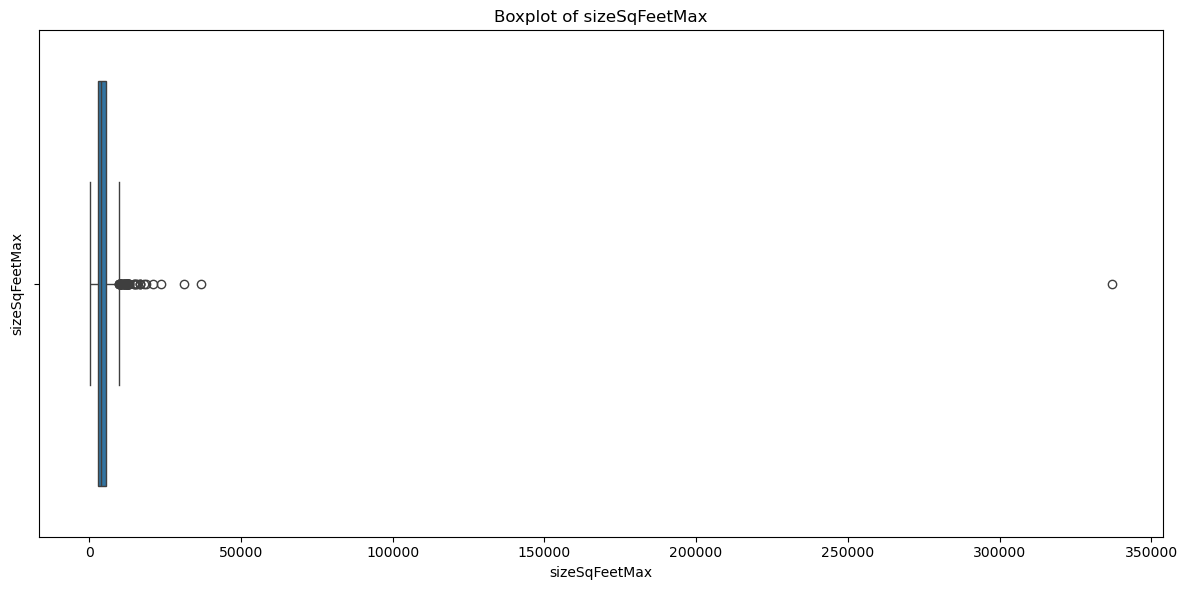

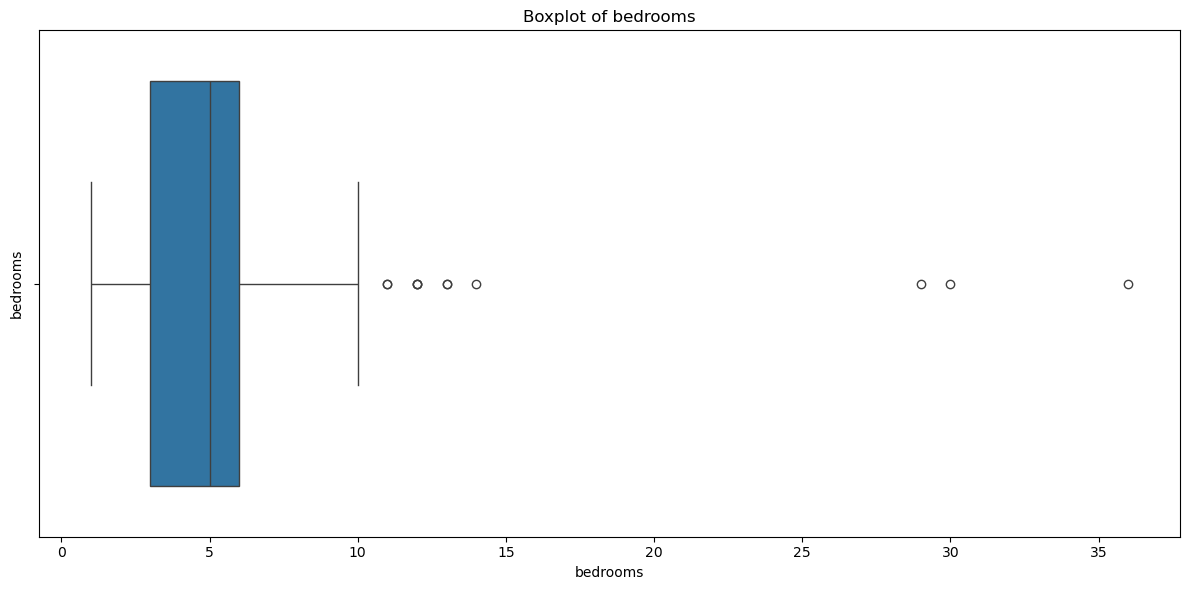

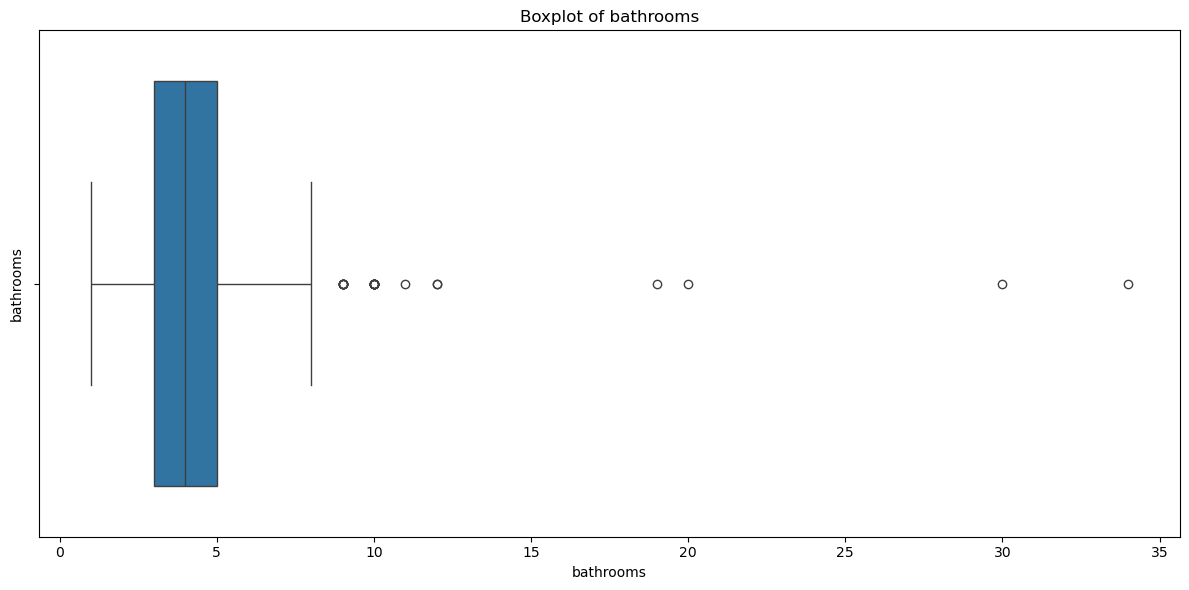

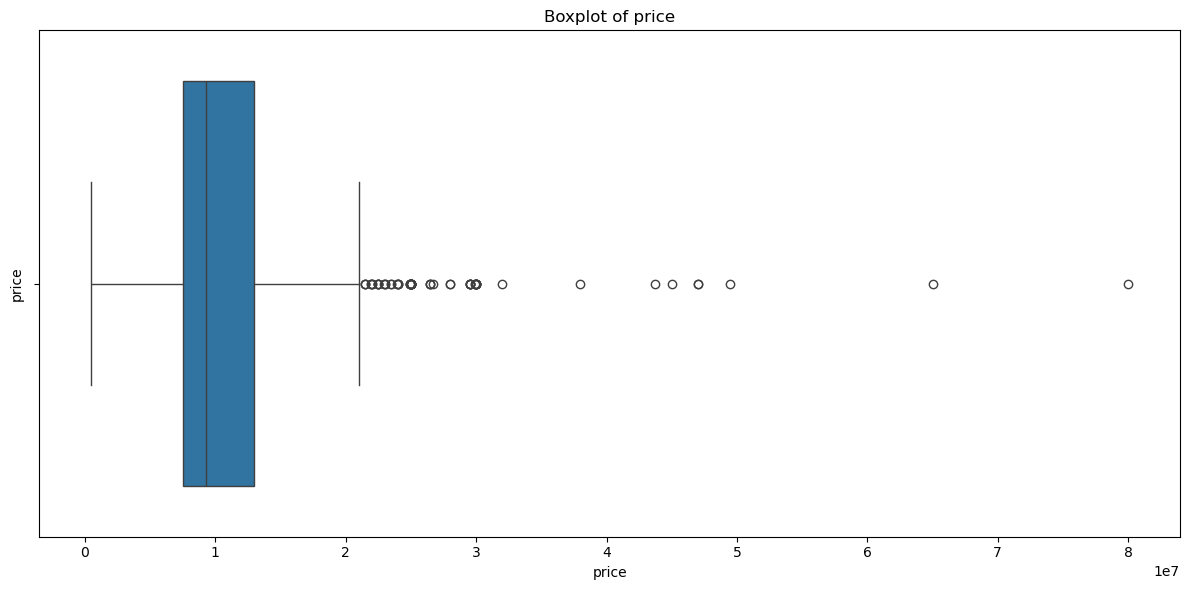

In [17]:
columns_to_plot = df.drop(['addedOn', 'title','descriptionHtml','propertyType','listingUpdateReason','location'], axis=1)

# Creating a boxplot for each column (attributes)
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column]) 
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show() 

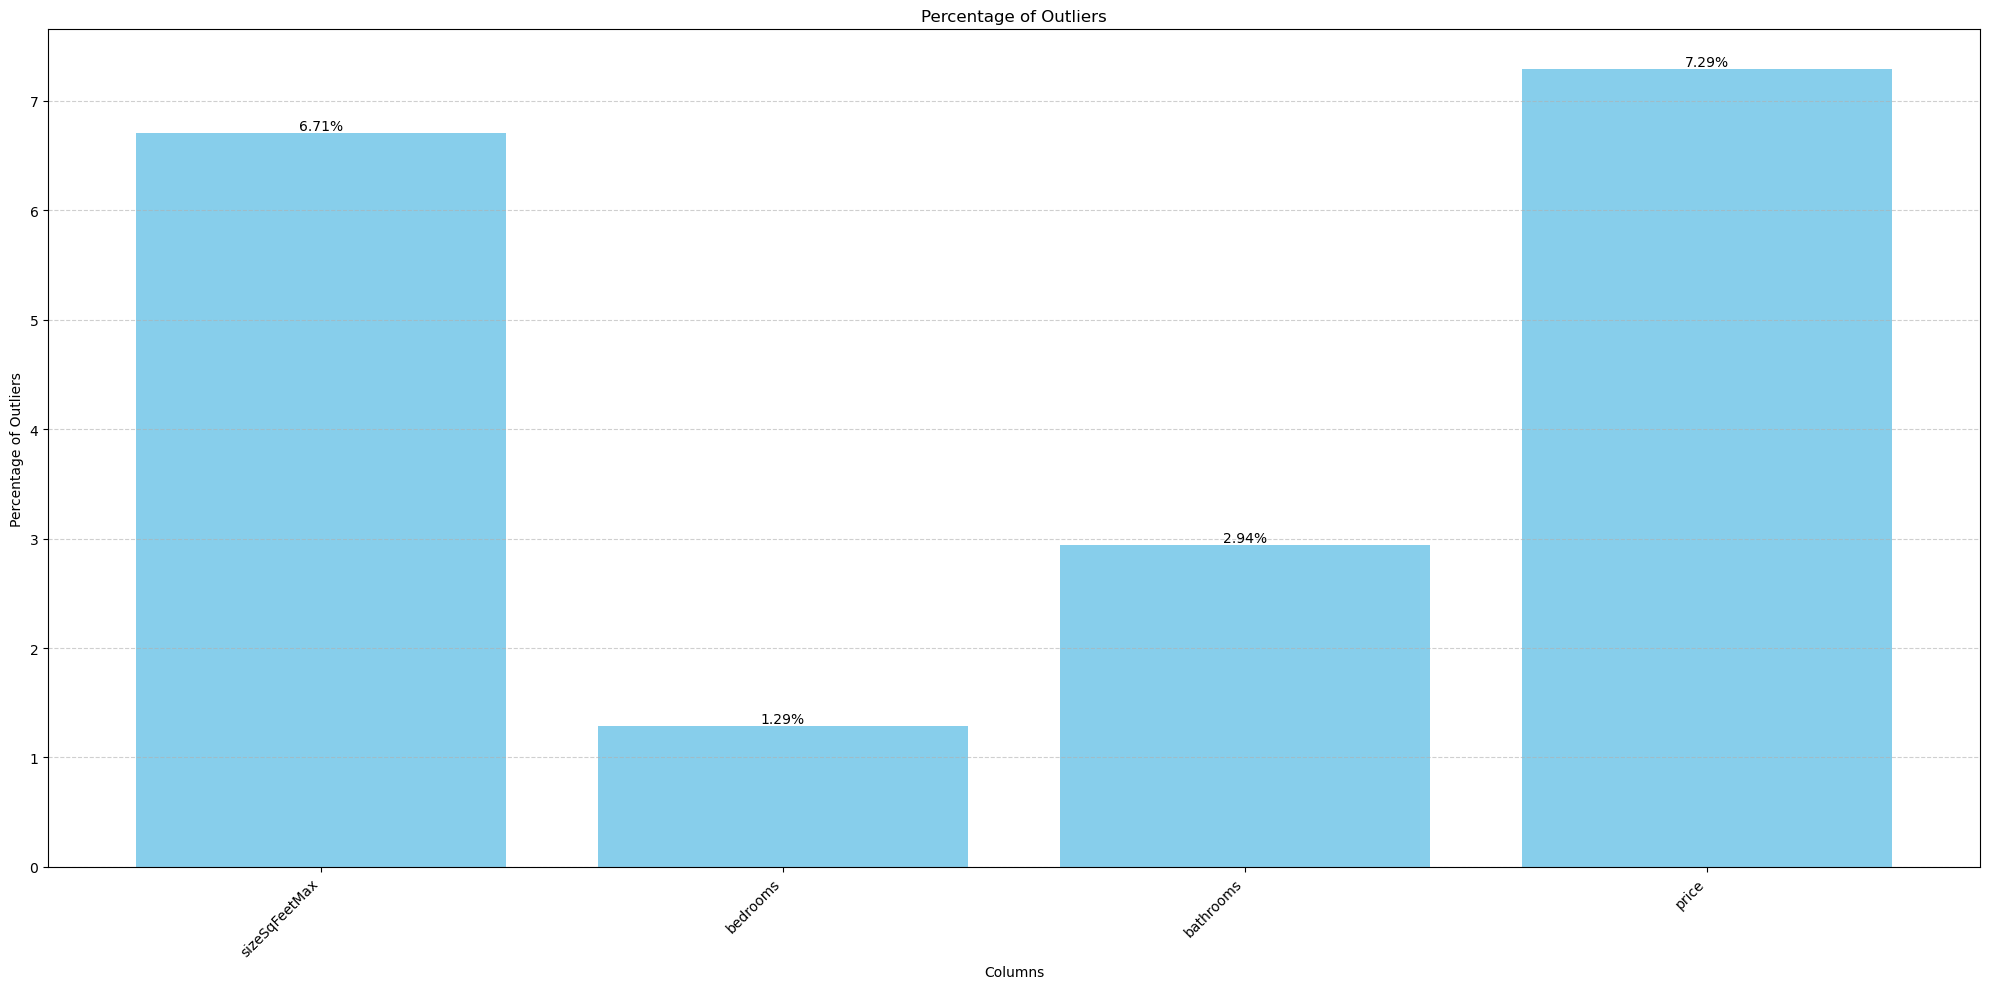

In [18]:
# Function to calculate the % of outliers
def calculate_percentage_of_outliers(df, column_name):
    # Calculate Interquartile Range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identifying outliers using the IQR method
    outliers = (df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))

    # Calculating the % of outliers
    percentage_of_outliers = round((outliers.sum() / len(df)) * 100, 2)

    return percentage_of_outliers

# Getting the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Storing columns with outliers and their %
percentage_outliers = []
columns_with_outliers = []

for column in numerical_columns:
    percentage = calculate_percentage_of_outliers(df, column)
    if percentage != 0:
        percentage_outliers.append(percentage)
        columns_with_outliers.append(column)

# Plotting the results with non-zero outlier %
plt.figure(figsize=(20, 10))

bars = plt.bar(columns_with_outliers, percentage_outliers, color='skyblue')

# Manually annotate with % values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}%', ha='center', va='bottom', color='black')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Outliers')
plt.xlabel('Columns')
plt.title('Percentage of Outliers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Creating a Headmap for Correlation Matrix

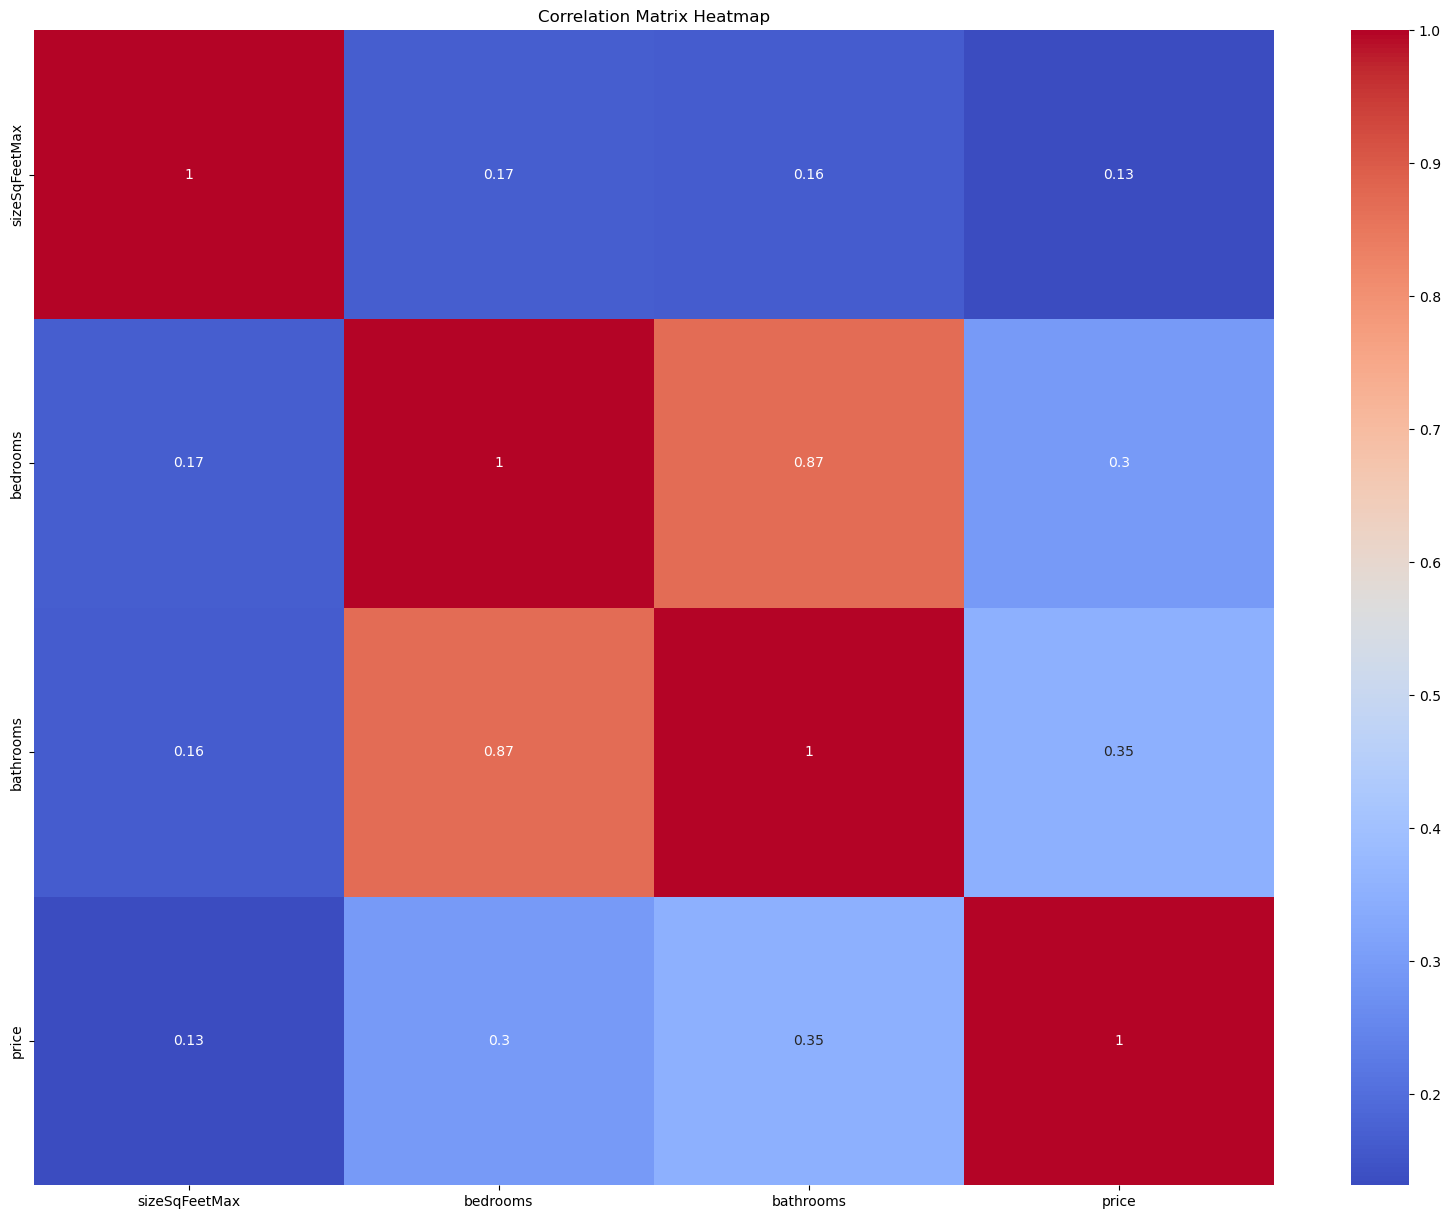

In [20]:
# Checking a general correlation matrix of the dataset
plt.figure(figsize=(20, 15))
sns.heatmap(columns_to_plot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pre-processing the dataset and transform it for further study within the model

In [22]:
#Checking our columns
df.columns

Index(['addedOn', 'title', 'descriptionHtml', 'propertyType', 'sizeSqFeetMax',
       'bedrooms', 'bathrooms', 'listingUpdateReason', 'price', 'location'],
      dtype='object')

In [23]:
df.head(2)

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,location
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,24950000.0,Winnington Road
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,29500000.0,Brick Street


## Encoding categorical variables

In [25]:
df1 = pd.get_dummies(df, columns=['propertyType'], drop_first=True)
# Convert boolean values to integers (1 and 0) for all boolean columns in the DataFrame
df1 = df1.astype({col: int for col in df1.select_dtypes(include='bool').columns})

In [26]:
#Dropping not useful columns
df1.drop(['title','listingUpdateReason','descriptionHtml'],axis=1,inplace=True)
df1.head(1)

,addedOn,sizeSqFeetMax,bedrooms,bathrooms,price,location,propertyType_Block of Apartments,propertyType_Detached,propertyType_Duplex,propertyType_End of Terrace,...,propertyType_House,propertyType_Link Detached House,propertyType_Maisonette,propertyType_Mews,propertyType_Not Specified,propertyType_Penthouse,propertyType_Semi-Detached,propertyType_Terraced,propertyType_Town House,propertyType_Villa
0,10/10/2024,16749.0,8.0,8.0,24950000.0,Winnington Road,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


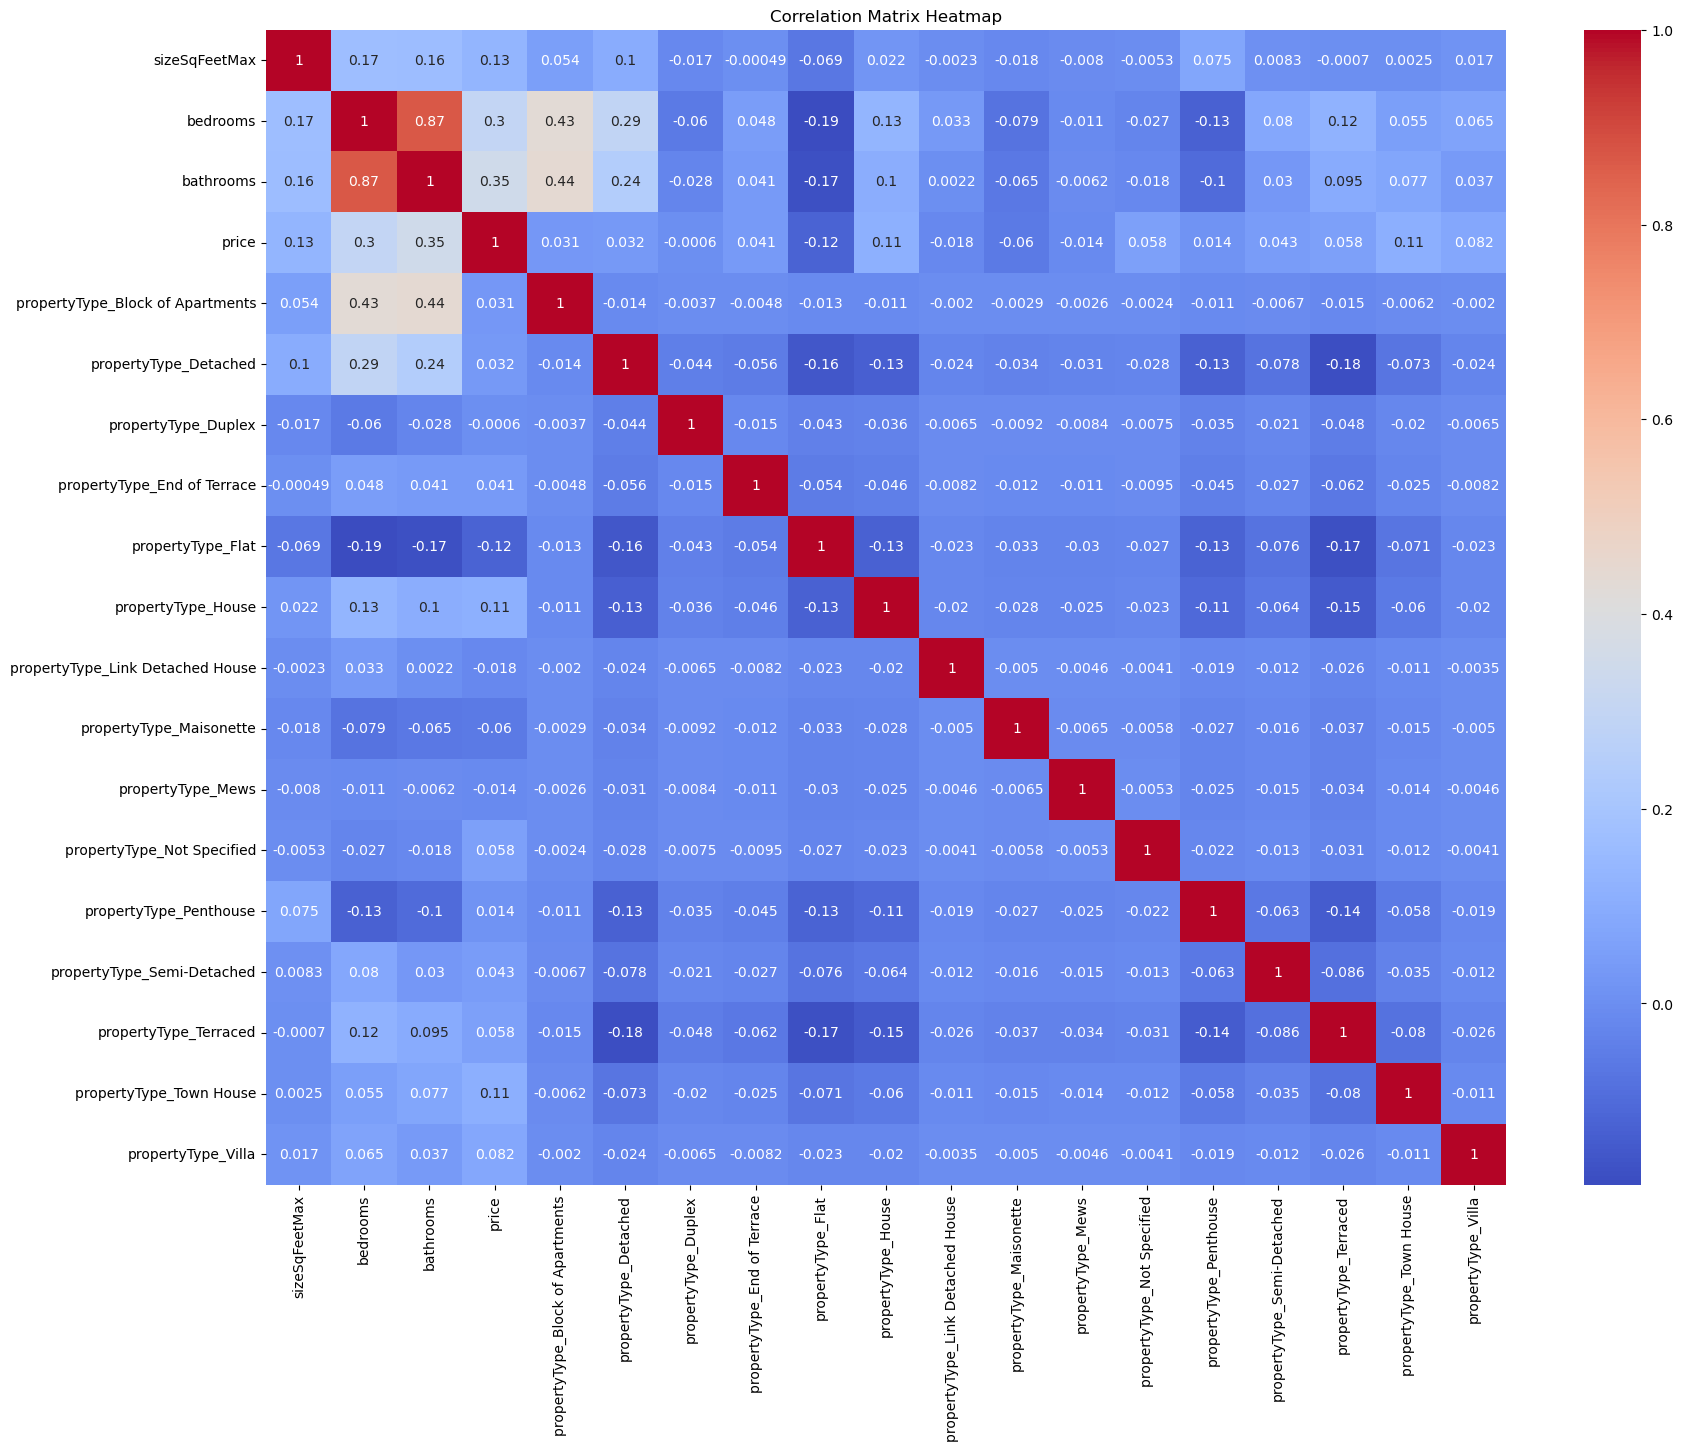

In [27]:
# Checking a general correlation matrix of the dataset
df1_test = df1.drop(['location','addedOn'],axis=1,inplace=True)
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Scaling Variables

In [29]:
df1.head()

,sizeSqFeetMax,bedrooms,bathrooms,price,propertyType_Block of Apartments,propertyType_Detached,propertyType_Duplex,propertyType_End of Terrace,propertyType_Flat,propertyType_House,propertyType_Link Detached House,propertyType_Maisonette,propertyType_Mews,propertyType_Not Specified,propertyType_Penthouse,propertyType_Semi-Detached,propertyType_Terraced,propertyType_Town House,propertyType_Villa
0,16749.0,8.0,8.0,24950000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,12960.0,7.0,7.0,29500000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,6952.0,6.0,6.0,25000000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16749.0,6.0,6.0,24950000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10241.0,8.0,10.0,24950000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Importing Scaler from sklearn library
from sklearn.preprocessing import StandardScaler

# Columns to scale
cols_to_scale = ['bathrooms', 'bedrooms','sizeSqFeetMax']

# Scaling the columns
scaler = StandardScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

# Spliting the dependent and independent variables
X = df1.drop('price', axis=1)
y = df1['price']

# Applying log1p to 'y'
y_train_scaled = np.log1p(y)

# Showing the first records of X and y_train_scaled
print(X.head())
print(y_train_scaled.head())

   sizeSqFeetMax  bedrooms  bathrooms  propertyType_Block of Apartments  \
0       0.982548  1.235551   1.501673                                 0   
1       0.662449  0.828963   1.062285                                 0   
2       0.154885  0.422374   0.622897                                 0   
3       0.982548  0.422374   0.622897                                 0   
4       0.432744  1.235551   2.380449                                 0   

   propertyType_Detached  propertyType_Duplex  propertyType_End of Terrace  \
0                      0                    0                            0   
1                      0                    0                            0   
2                      0                    0                            0   
3                      1                    0                            0   
4                      1                    0                            0   

   propertyType_Flat  propertyType_House  propertyType_Link Detached House  \
0 

# Modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def modeling(value):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_train_scaled, test_size=value, random_state=42)
    
    # Initialising regressors
    regressors = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.5, gamma='scale')
    }
    
    # Training and evaluating regressors
    results = {}
    for name, reg in regressors.items():
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        train_score = reg.score(X_train, y_train)  # Training R² score
        test_score = reg.score(X_test, y_test)  # Testing R² score
        
        results[name] = {
            'Split': value,
            'MAE': mae,
            'MSE': mse,
            'R2 Score': r2,
            'Train R² Score': train_score,
            'Test R² Score': test_score
        }

        # Visualising Actual vs Predicted values
        c = [i for i in range(1, len(y_test) + 1)]  
    
        fig = plt.figure()
        plt.plot(c, y_test, color="blue", linewidth=1.5, linestyle="-", label="Actual")
        plt.plot(c, y_pred, color="red", linewidth=1.5, linestyle="-", label="Predicted")
        fig.suptitle(f'{name} Actual vs Predicted', fontsize=20)
        plt.xlabel('Index', fontsize=18) 
        plt.ylabel('Value', fontsize=16) 
        plt.legend(fontsize=12)
        plt.show()
    
    # Converting results to a DataFrame
    results_df = pd.DataFrame(results).transpose()
    results_df = results_df.reset_index().rename(columns={'index': 'Model'})
    print(results_df)
    
    #Visualising metrics comparison
    results_long = results_df.melt(id_vars=['Model', 'Split'], value_vars=['MAE', 'MSE', 'R2 Score'], 
                               var_name='Metric', value_name='Score')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_long, x='Model', y='Score', hue='Metric')
    plt.title("Comparisson of MAE, MSE y R² Score between Models")
    plt.xlabel("Model")
    plt.ylabel("Metric Value")
    plt.legend(title="Metric")
    plt.show()


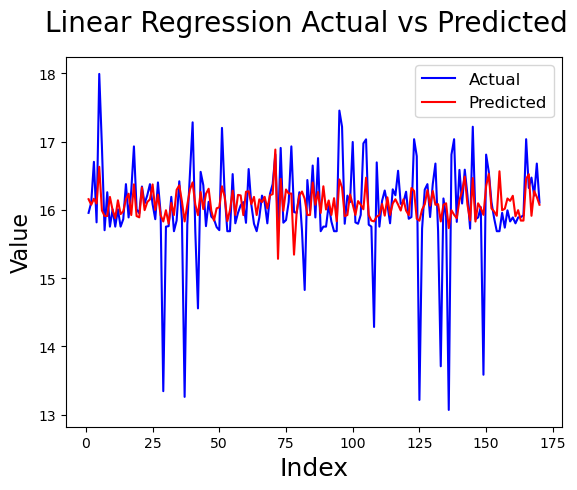

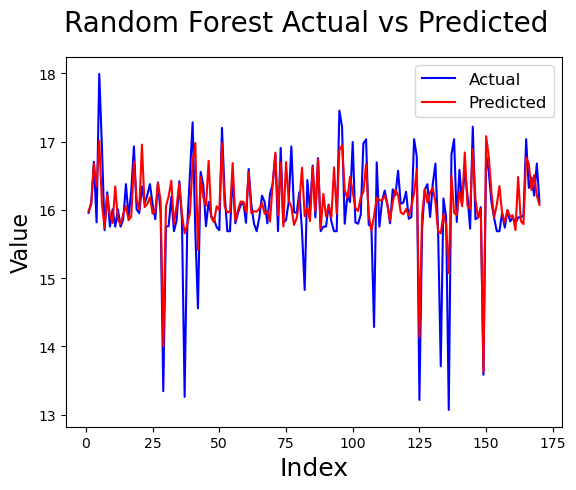

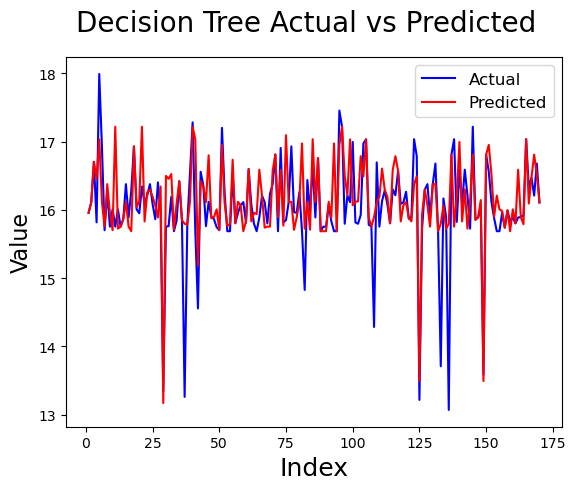

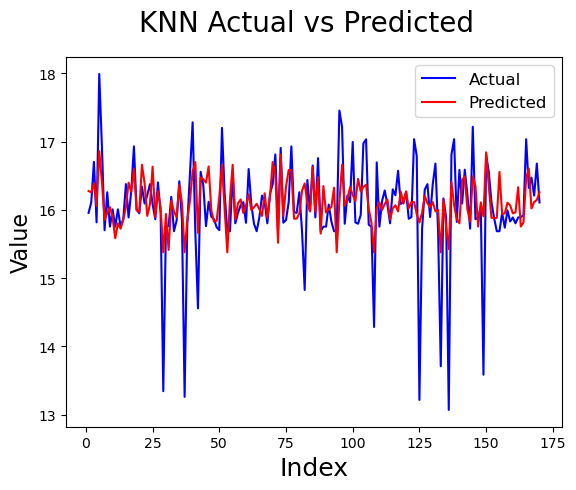

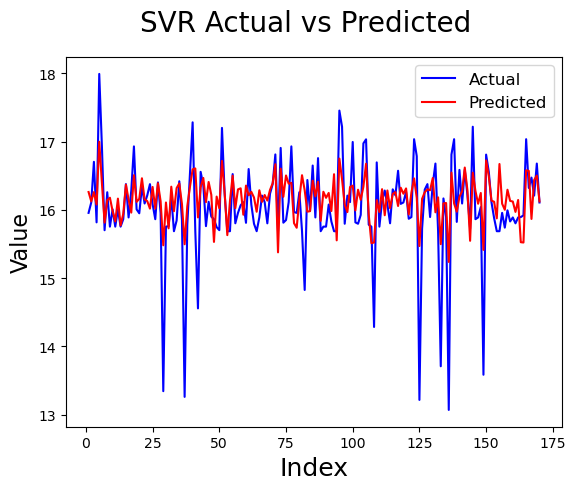

               Model  Split       MAE       MSE  R2 Score  Train R² Score  \
0  Linear Regression    0.2  0.384132  0.393915  0.203581        0.180870   
1      Random Forest    0.2  0.293477  0.223772  0.547577        0.918356   
2      Decision Tree    0.2  0.317226  0.292187  0.409254        0.999983   
3                KNN    0.2  0.366638  0.333420  0.325890        0.547253   
4                SVR    0.2  0.367273  0.304928  0.383495        0.406429   

   Test R² Score  
0       0.203581  
1       0.547577  
2       0.409254  
3       0.325890  
4       0.383495  


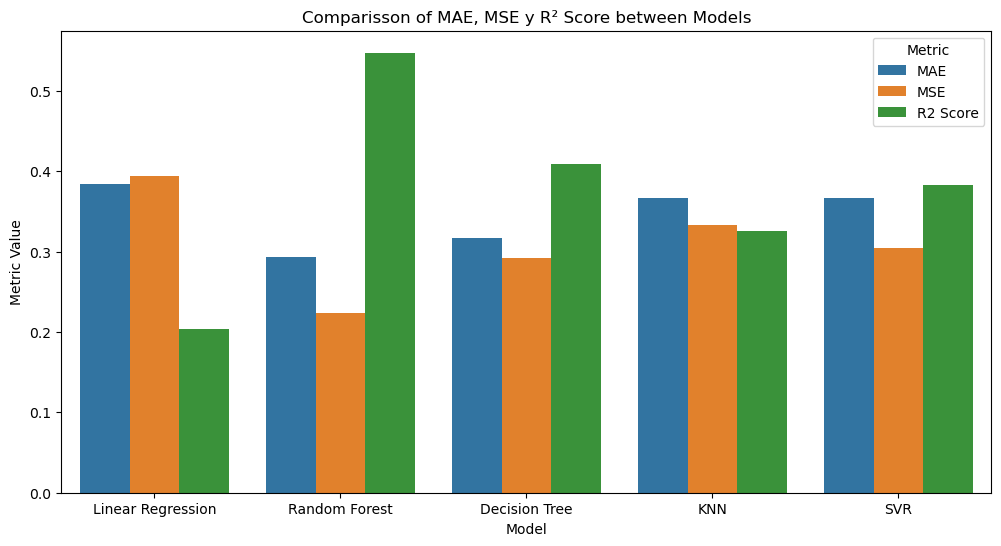

In [33]:
#Geetting results by using 20% for test
modeling(0.2)

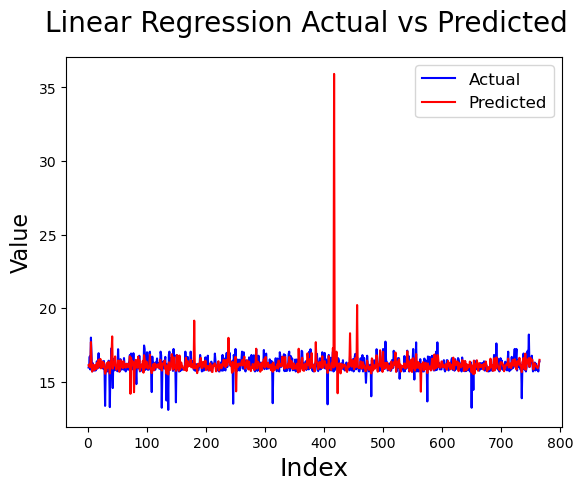

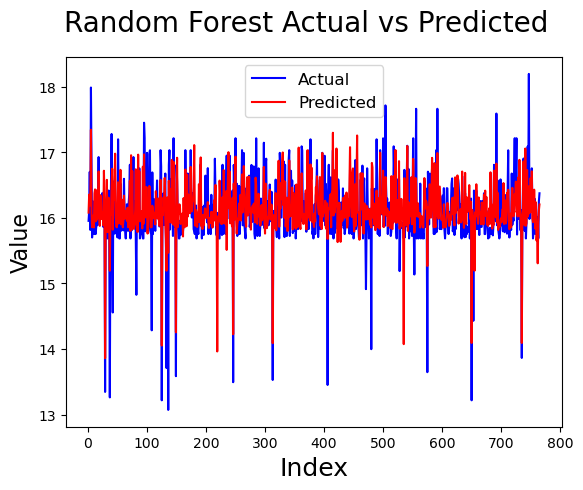

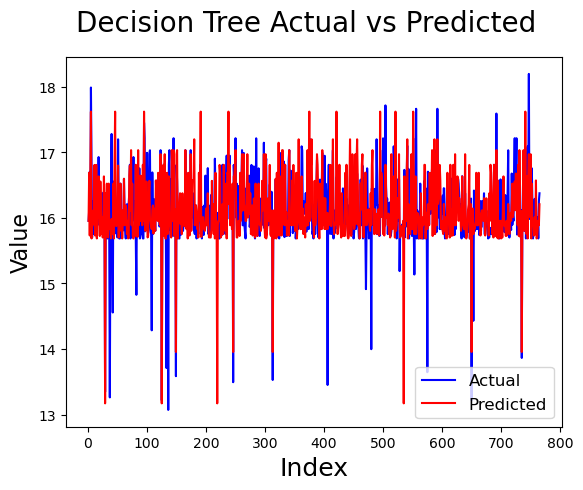

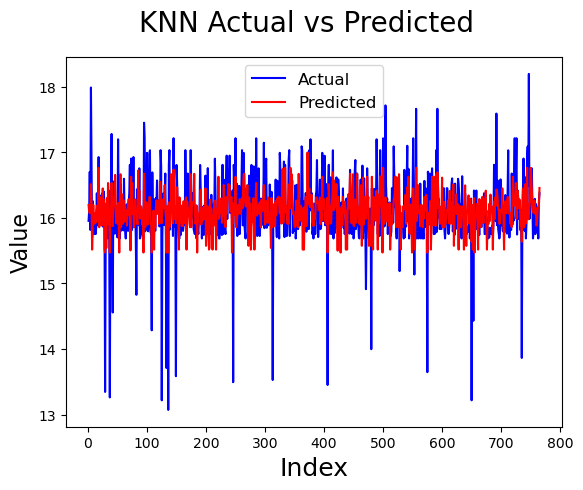

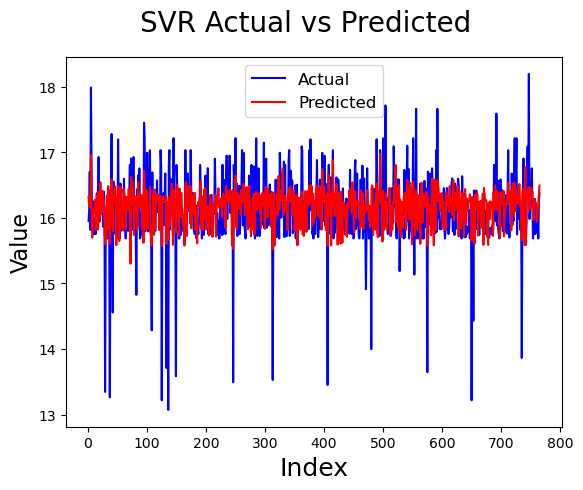

               Model  Split       MAE       MSE  R2 Score  Train R² Score  \
0  Linear Regression    0.9  0.356904  0.781760 -1.565401        0.405252   
1      Random Forest    0.9  0.300697  0.180789  0.406728        0.907062   
2      Decision Tree    0.9  0.358512  0.280345  0.080029        1.000000   
3                KNN    0.9  0.345124  0.244869  0.196445        0.304475   
4                SVR    0.9  0.348887  0.234727  0.229725        0.385685   

   Test R² Score  
0      -1.565401  
1       0.406728  
2       0.080029  
3       0.196445  
4       0.229725  


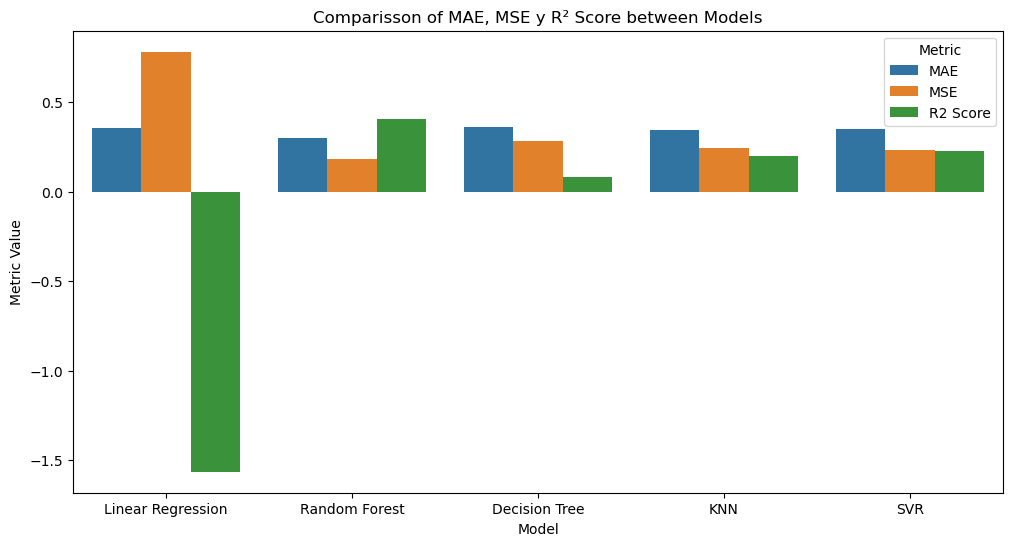

Mean CV Score: -0.5637493964700498
Std CV Score: 0.9605437269506886


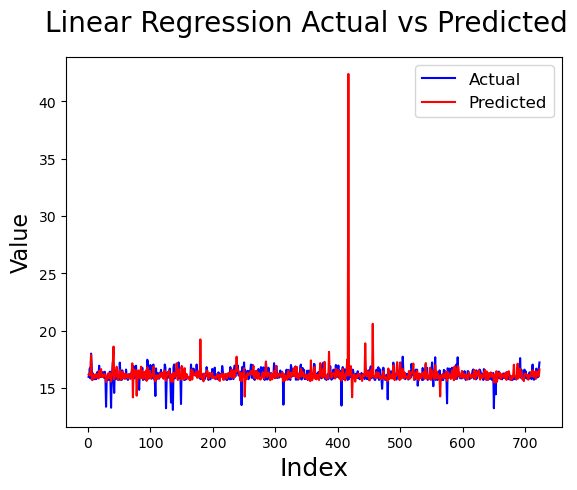

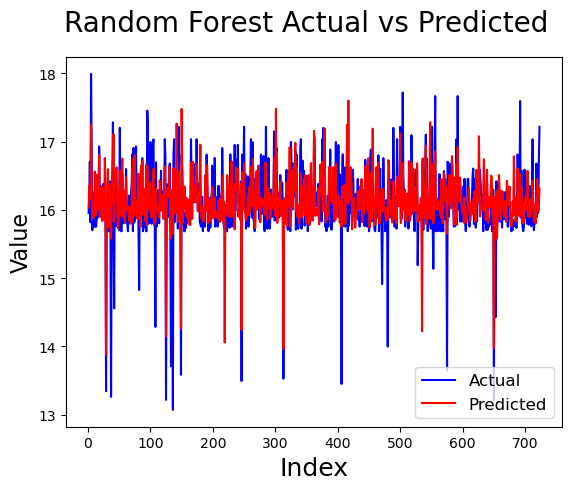

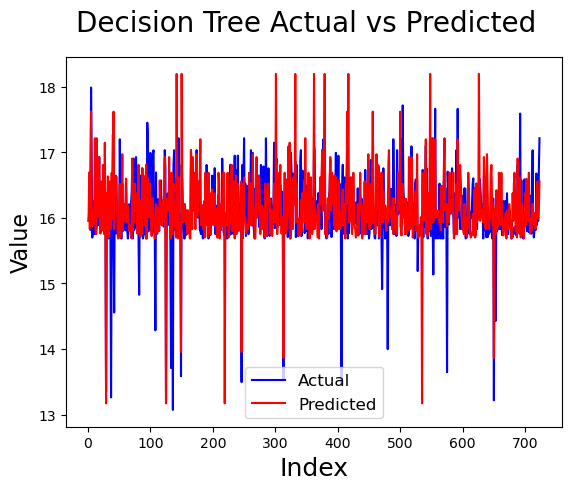

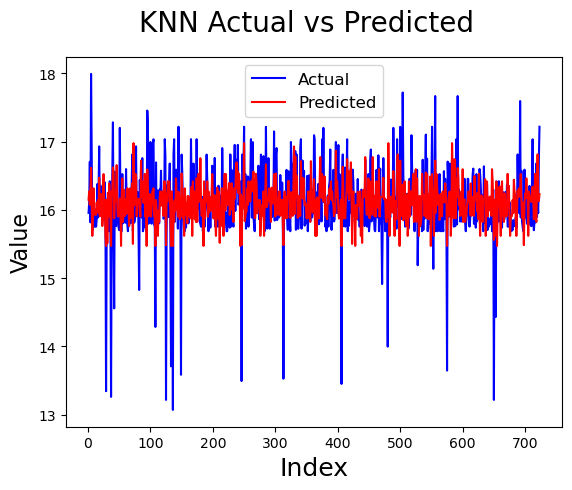

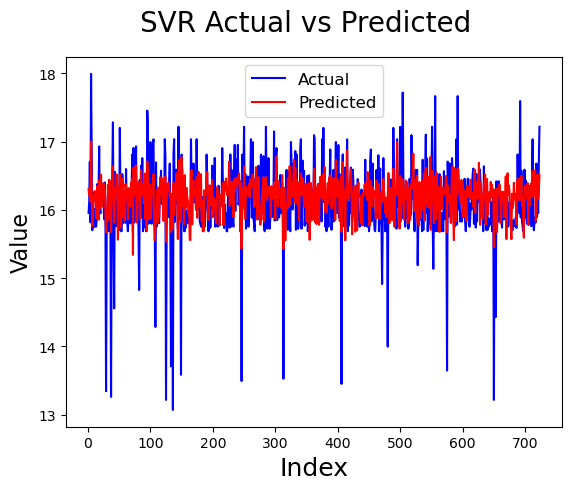

               Model  Split       MAE       MSE  R2 Score  Train R² Score  \
0  Linear Regression   0.85  0.381361  1.245603 -3.150076        0.431178   
1      Random Forest   0.85  0.296140  0.184682  0.384680        0.907850   
2      Decision Tree   0.85  0.368158  0.306621 -0.021593        1.000000   
3                KNN   0.85  0.352675  0.237767  0.207811        0.336040   
4                SVR   0.85  0.352706  0.237342  0.209228        0.416957   

   Test R² Score  
0      -3.150076  
1       0.384680  
2      -0.021593  
3       0.207811  
4       0.209228  


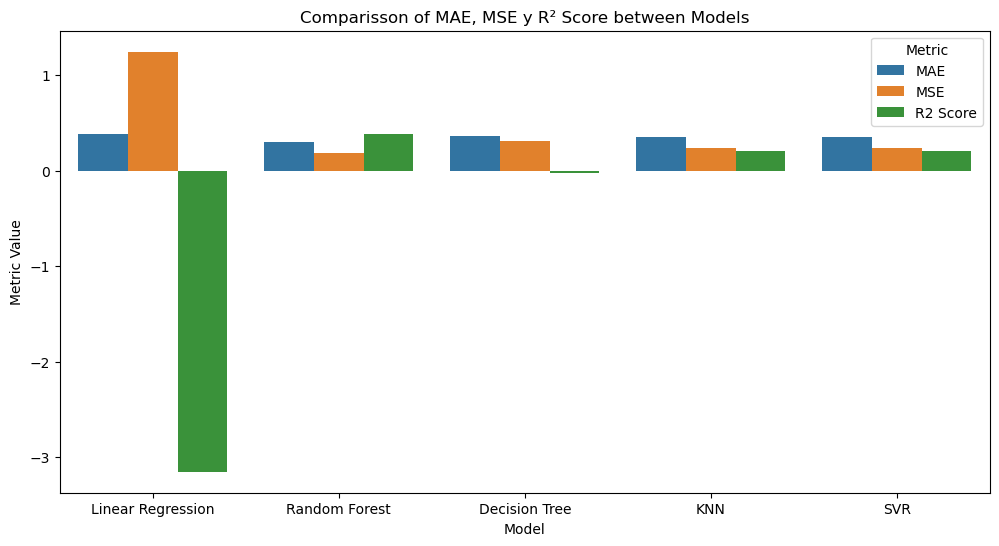

Mean CV Score: -0.026092917403930403
Std CV Score: 0.4528645748457762


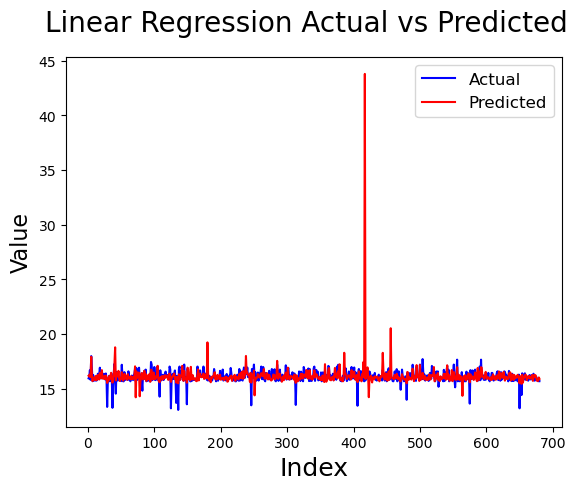

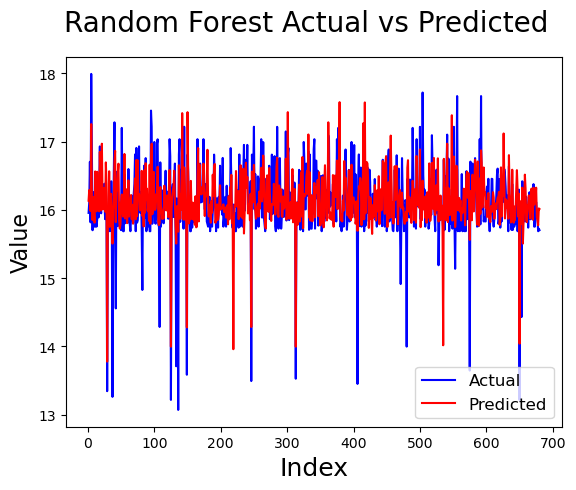

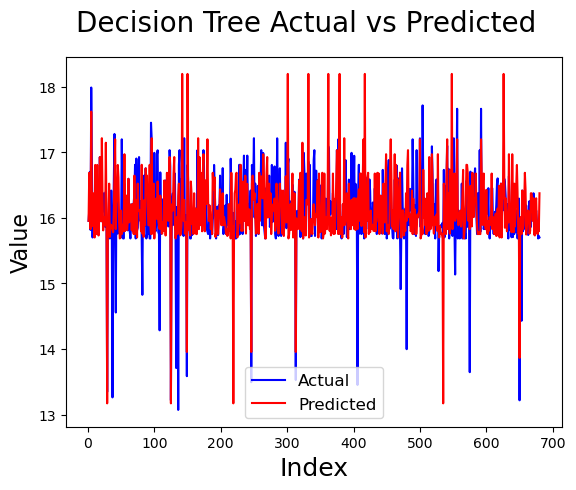

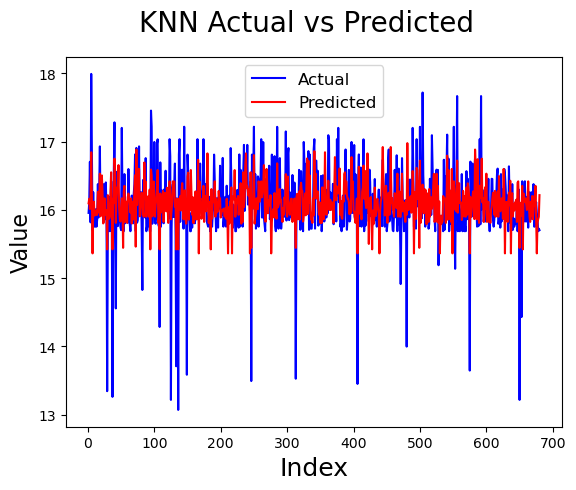

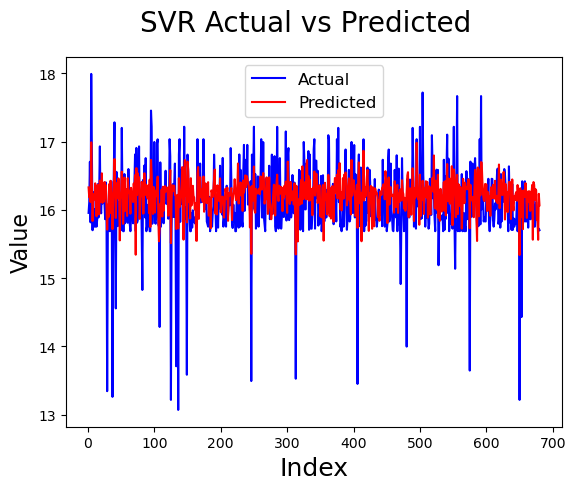

               Model  Split       MAE       MSE  R2 Score  Train R² Score  \
0  Linear Regression    0.8  0.372168  1.410843 -3.602888        0.419350   
1      Random Forest    0.8  0.299983  0.192470  0.372064        0.910376   
2      Decision Tree    0.8  0.371512  0.322633 -0.052592        1.000000   
3                KNN    0.8  0.337091  0.232167  0.242554        0.348027   
4                SVR    0.8  0.345206  0.234317  0.235538        0.399844   

   Test R² Score  
0      -3.602888  
1       0.372064  
2      -0.052592  
3       0.242554  
4       0.235538  


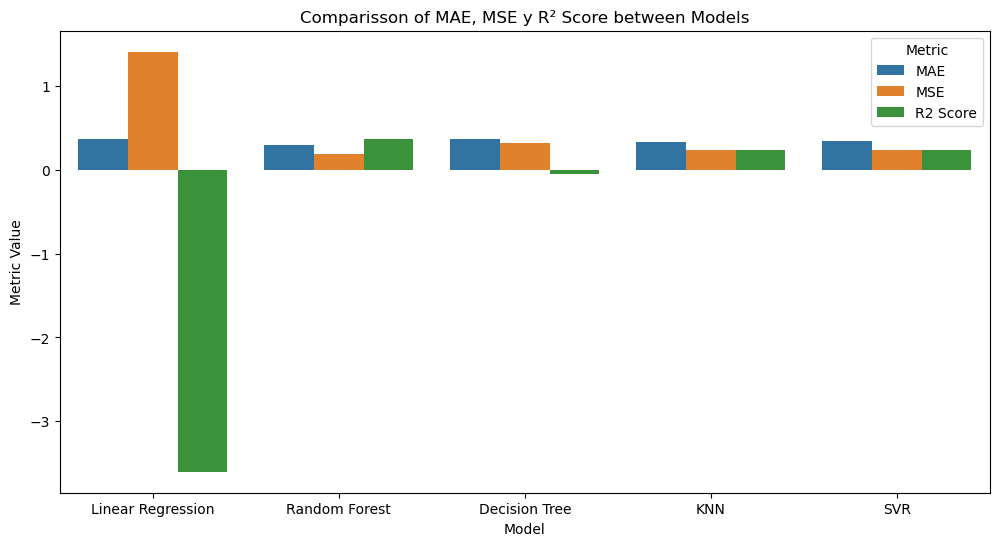

Mean CV Score: 0.16483353468151787
Std CV Score: 0.21882911299515773


In [34]:
# Setting 3 types of test_size for 10%, 15% and 25%.
splits = [0.1, 0.15, 0.20]

# Calling modelin function with different split size 
for split in splits:
    modeling(1-split)
    X_train, X_test, y_train, y_test = train_test_split(X, y_train_scaled, test_size=1-split, random_state=42)
    rf = RandomForestRegressor().fit(X_train, y_train)
    
    cv_scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='r2')
    print(f'Mean CV Score: {np.mean(cv_scores)}')
    print(f'Std CV Score: {np.std(cv_scores)}')


## Findings on training data at 10%, 15% and 25%

Due to this underfitting in training data, it can be observed that the model may not adequately learn the relationships between variables as the model is less able to capture general patterns. This leads to more inaccurate predictions, reflected in a higher MSE and a lower R2 score.

In [35]:
#Appliying cross-validaton to best model before using GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y_train_scaled, test_size=0.2, random_state=42)
rf = RandomForestRegressor().fit(X_train, y_train)

cv_scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='r2')
print(f'Mean Score: {np.mean(cv_scores)}')
print(f'Std Score: {np.std(cv_scores)}')



Mean Score: 0.3889812770979256
Std Score: 0.07045197806509891


### Findings

The random forest was the best fit for the dataset.

# Tuning the Hyperparameters
## Using GridSearchCV to get the best combination of parameters

In [38]:
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best parameter combination: {grid_search.best_params_}')

Best parameter combination: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


MSE: 0.1574388917925067
R^2: 0.6131104460268191


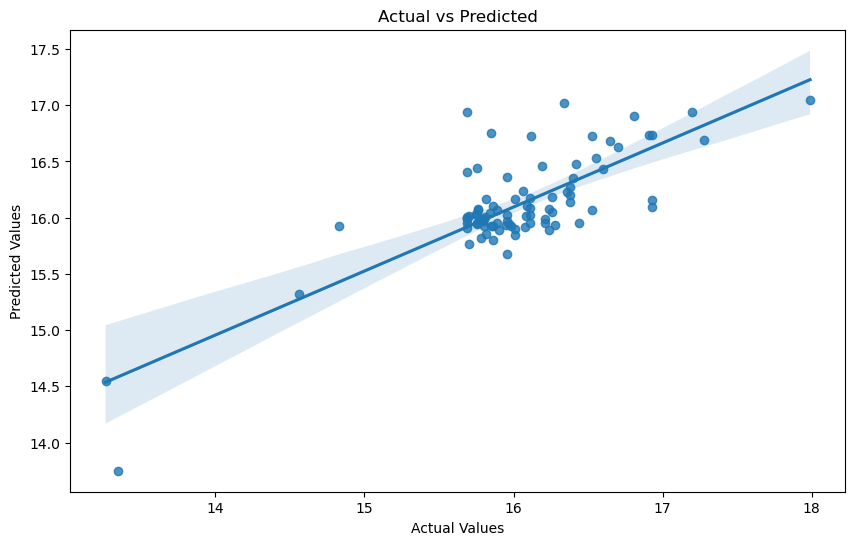

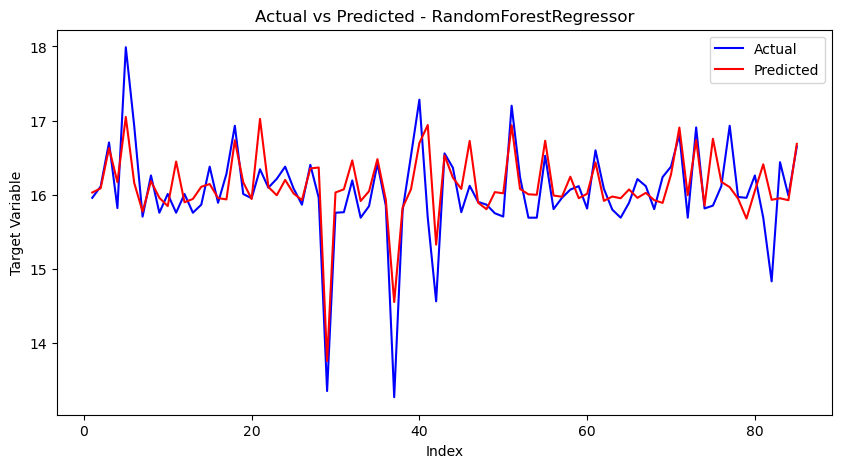

In [39]:
# Setting parameters
best_params = {'max_depth': 10, 'min_samples_leaf':1, 'min_samples_split': 5, 'n_estimators': 200}

# Splitting training data 80% testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y_train_scaled, test_size=0.1, random_state=42)

# Creating the random forest model with best parameters
rf = RandomForestRegressor(**best_params)

# Training the model
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#Calculing MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

plt.figure(figsize=(10, 6))
sns.regplot(x = y_test, y = y_pred)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Graphs to compae current values against predicted
plt.figure(figsize=(10, 5))
index = [i for i in range(1, len(y_test) + 1)]
plt.plot(index, y_test, label="Actual", color="blue", linewidth=1.5)
plt.plot(index, y_pred, label="Predicted", color="red", linewidth=1.5)
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.xlabel("Index")
plt.ylabel("Target Variable")
plt.legend()
plt.show()

In [40]:
# Using cross validation to random forest model with best parameters
cv_scores = cross_val_score(rf,X_train, y_train, cv=5, scoring='r2')
print(f'Mean CV Score: {np.mean(cv_scores)}')
print(f'Std CV Score: {np.std(cv_scores)}')


Mean CV Score: 0.48730700952550476
Std CV Score: 0.07911250906739431


## Visualising the feature importance

In [42]:
# Obtaining the feature importance
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                             Feature  Importance
0                      sizeSqFeetMax    0.731313
1                           bedrooms    0.073821
2                          bathrooms    0.072968
4              propertyType_Detached    0.058184
13            propertyType_Penthouse    0.021417
16           propertyType_Town House    0.012397
7                  propertyType_Flat    0.007430
15             propertyType_Terraced    0.006644
14        propertyType_Semi-Detached    0.004285
8                 propertyType_House    0.002991
5                propertyType_Duplex    0.002517
6        propertyType_End of Terrace    0.002471
12        propertyType_Not Specified    0.002391
10           propertyType_Maisonette    0.000900
3   propertyType_Block of Apartments    0.000110
17                propertyType_Villa    0.000087
9   propertyType_Link Detached House    0.000040
11                 propertyType_Mews    0.000031


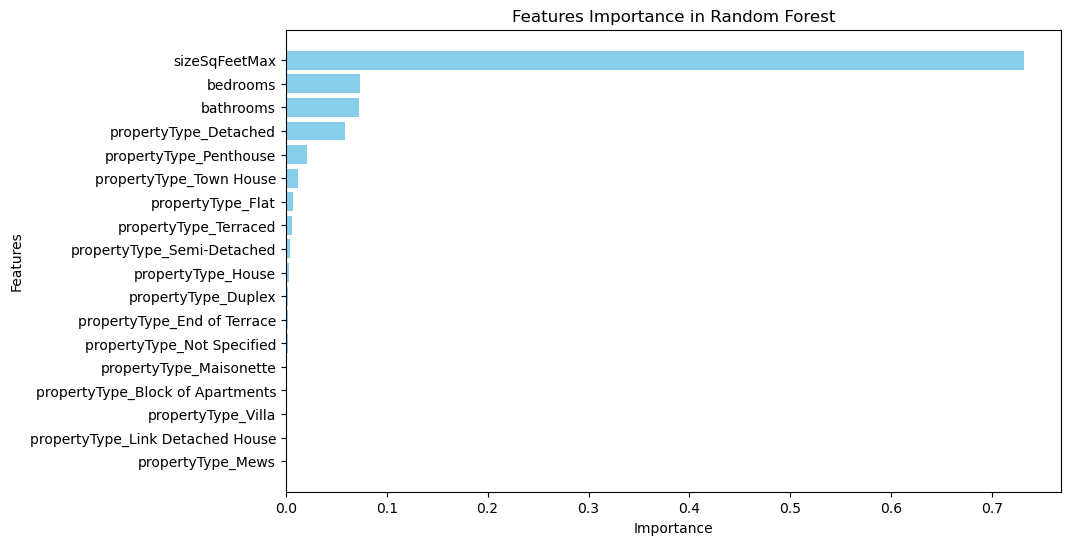

In [43]:
# Plotting the features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

## Findings

sizeSqFeetMax is the most important feature for predicting the price in this dataset in relation to the price of the eachh house.